This is my python code for gradient descent optimization method.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#function to be optimized
#a = 10
def f(x,y):
  return 5*(x*x) - 30*x + y*y - 8*y + 4*x*y + 34


#derivative of function
def f_derivative(x,y):
  return 10*x - 30 + 4*y , 2*y - 8 +4*x

#learning rate
alpha = 0.01

#Iterations
total_iterations = 1000

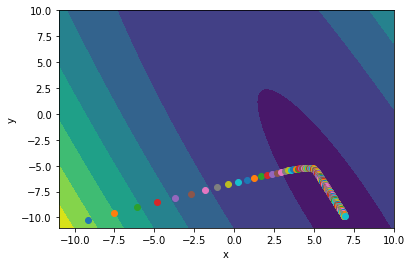

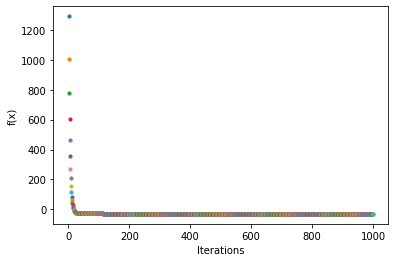

6.926619235608653
-9.822843163389106
-30.993691388679366


In [8]:
plt.figure(1)
xlist = np.linspace(-11, 10, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-11, 10, 100)
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
Z = f(X,Y) # Compute function values on the grid
plt.contourf(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.figure(2)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
iteration = 0
x = X[0][0]
y = Y[0][0]

plt.figure(1)
#gradient descent
while iteration < total_iterations :
  iteration+=1
  x_derivative,y_derivative = f_derivative(x,y);
  x-=x_derivative*alpha
  y-=y_derivative*alpha
  plt.figure(1)
  plt.scatter(x,y)
  plt.figure(2)
  plt.scatter(iteration,f(x,y),s=10)

plt.show()
print(x)
print(y)
print(f(x,y))

**Question 3**




In [27]:
import sympy as sp

In [33]:
a = 1
x,y = sp.symbols('x y')
fun = y**3
ineq1 = x**2 + 4*(y**2) - 24
ineq2 = x + a*y
lambda1, lambda2 = sp.symbols('lambda1 lambda2')
L = fun + lambda1*ineq1 + lambda2*ineq2

In [40]:
#solving delta(L) = 0 for both active
answers = sp.solve([sp.Eq(sp.diff(L,x), 0), 
                   sp.Eq(sp.diff(L,y), 0),
                   sp.Eq(sp.diff(L,lambda1), 0),
                   sp.Eq(sp.diff(L,lambda2), 0)],
                  [x,y,lambda1,lambda2])

xvall = 0
yvall = 0

for answer in answers:
  x_val,y_val,lambda1_val,lambda2_val = answer
  if(lambda1_val > 0 and lambda2_val > 0):
    print('Both Constraints active')
    print('x = ',x,' y = ',y)
    print('f(x,y) = ', fun.subs(y,y_val))
    xvall = x_val, yvall = y_val

In [41]:
#solving delta(L) = 0 for first inequation active and second inactive
answers = sp.solve([sp.Eq(sp.diff(L,x), 0), 
                   sp.Eq(sp.diff(L,y), 0),
                   sp.Eq(sp.diff(L,lambda1), 0),
                   sp.Eq(lambda2, 0)],
                  [x,y,lambda1,lambda2])



for answer in answers:
  x_val,y_val,lambda1_val,lambda2_val = answer
  if(lambda1_val > 0):
    print('First Constraint active')
    print('x = ',x_val,' y = ',y_val)
    print('f(x,y) = ', fun.subs(y,y_val))
    xvall = x_val; yvall = y_val
  

First Constraint active
x =  0  y =  -sqrt(6)
f(x,y) =  -6*sqrt(6)


In [42]:
#solving delta(L) = 0 for first inequation inactive and second active
answers = sp.solve([sp.Eq(sp.diff(L,x), 0), 
                   sp.Eq(sp.diff(L,y), 0),
                   sp.Eq(lambda1, 0),
                   sp.Eq(sp.diff(L,lambda2), 0)],
                   [x,y,lambda1,lambda2])

for answer in answers:
  x_val,y_val,lambda1_val,lambda2_val = answer
  if(lambda2_val > 0):
    print('Second Constraints active')
    print('x = ',x_val,' y = ',y_val)
    print('f(x,y) = ', fun.subs(y,y_val))
    xvall = x_val; yvall = y_val

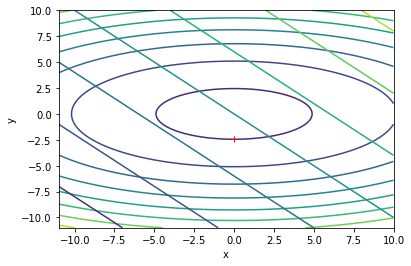

In [44]:
plt.figure(3)

plt.xlabel('x')
plt.ylabel('y')
xlist = np.linspace(-11, 10, 100)
ylist = np.linspace(-11, 10, 100)
X,Y = np.meshgrid(xlist, ylist)
Z = X**2 + 4*(Y**2) - 24
plt.contour(X,Y,Z)
Z = X + a*Y
plt.contour(X,Y,Z)
plt.plot(xvall,yvall,'r+')
